# Stanford Open Policing Project

# Importing the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
sns.set_context('talk', font_scale = 0.8)
sns.set_palette('pastel')

In [5]:
sns.set(style='whitegrid')

# Preparing the data

In [6]:
dataset = pd.read_csv('police_project.csv')
dataset.head(10)

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
5,2005-03-23,09:45,NaN,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
6,2005-04-01,17:30,NaN,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
7,2005-06-06,13:20,NaN,F,1986.0,19.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
8,2005-07-13,10:15,NaN,M,1970.0,35.0,Black,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
9,2005-07-13,15:45,NaN,M,1970.0,35.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [7]:
dataset.shape

(91741, 15)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [9]:
dataset.isna().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

# Gender distribution

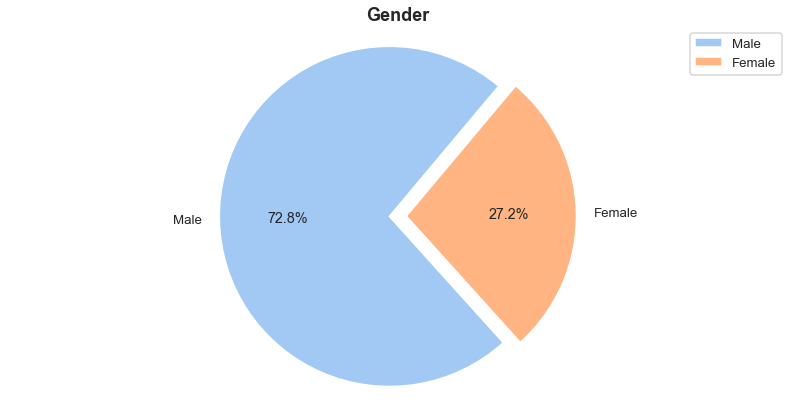

In [10]:
plt.figure(figsize=(14, 7))
sns.set_context('talk', font_scale = 0.8)
sns.set_palette('pastel')
dataset['driver_gender'].value_counts().plot(kind = 'pie', labels  = ['Male','Female'],
                                                                    explode = [0.05,0.05],startangle = 50, ylabel = '',
                                                                    autopct = '%1.1f%%')
plt.title('Gender', fontsize = 18, fontweight = 'bold')
plt.axis('equal')
plt.legend()
plt.show()

# Drivers race distribution

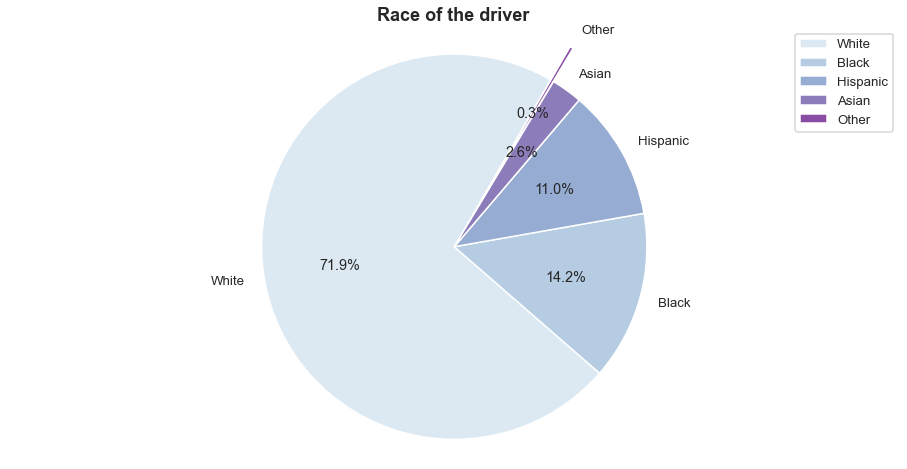

In [11]:
plt.figure(figsize=(16, 8))
sns.set_context('talk', font_scale = 0.8)
sns.set_palette('BuPu')
dataset['driver_race'].value_counts().plot(kind = 'pie', ylabel = '', 
                                           explode = [0,0,0,0,0.2],
                                           autopct = '%1.1f%%', startangle = 60)
plt.title('Race of the driver',fontsize = 18, fontweight = 'bold')
plt.axis('equal')
plt.legend()
plt.show()

# Violation

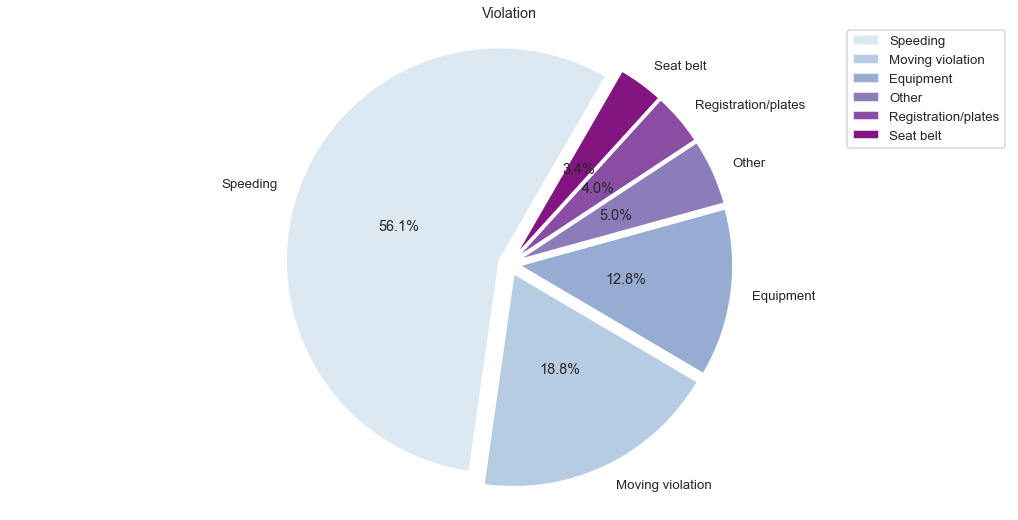

In [12]:
plt.figure(figsize=(18, 9))

dataset['violation'].value_counts().plot(kind = 'pie',
                explode = [0.05,0.05,0.05,0.05,0.05,0.05],startangle = 60,
                pctdistance=0.5,autopct = '%1.1f%%', ylabel = '')
plt.title('Violation')
plt.axis('equal')
plt.legend()
plt.show()

# Speeding Vs Gender

In [13]:
df = dataset[dataset.violation == 'Speeding']
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
6,2005-04-01,17:30,NaN,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


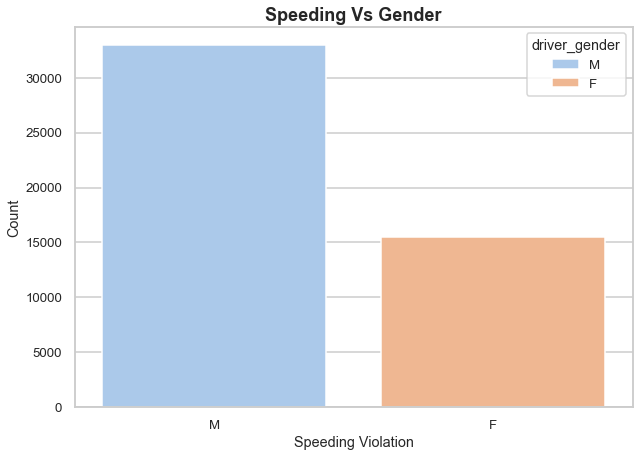

In [14]:
plt.figure(figsize=(10,7))
sns.set_palette('pastel')
ax = sns.countplot(x = df['driver_gender'], data  = df, hue = df['driver_gender'],  dodge = False )
ax.set(xlabel='Speeding Violation',ylabel='Count')
plt.title('Speeding Vs Gender', fontsize = 18, fontweight = 'bold')
plt.show()

Did they get arrested

# Equipment vs Gender

In [15]:
df1 = dataset[dataset.violation == 'Equipment']
df1.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
5,2005-03-23,09:45,NaN,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
17,2005-07-19,23:30,NaN,M,1979.0,26.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
35,2005-09-30,00:15,NaN,M,1978.0,27.0,White,Equipment/Inspection Violation,Equipment,False,NaN,N/D,False,0-15 Min,False
40,2005-10-01,00:00,NaN,M,1988.0,17.0,White,Equipment/Inspection Violation,Equipment,True,Probable Cause,Arrest Driver,True,16-30 Min,True
41,2005-10-01,00:00,NaN,M,1988.0,17.0,White,Equipment/Inspection Violation,Equipment,True,Probable Cause,Citation,False,30+ Min,True


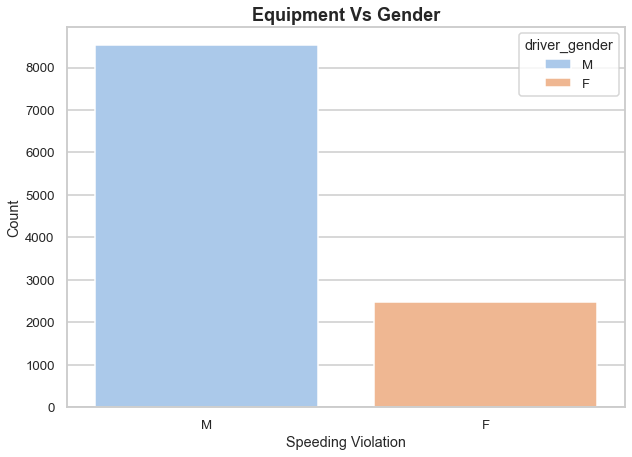

In [16]:
plt.figure(figsize=(10,7))
sns.set_palette('pastel')
ax = sns.countplot(x = df1['driver_gender'],hue = df1['driver_gender'], data  = df1, dodge = False )
ax.set(xlabel='Speeding Violation',ylabel='Count')
plt.title('Equipment Vs Gender', fontsize = 18, fontweight = 'bold')
plt.show()